1.. Find the census trck shape files online (American Fact Finder has them), http://www1.nyc.gov/ has them. The folder you should download is names nycb2010_16d. 
Load it as a geopandas file

In [7]:
import os 
import numpy as np
import pandas as pd
import geopandas as gp
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from fiona.crs import from_epsg
import shapely
%matplotlib inline

In [3]:
path = os.getenv("PUIDATA")

In [14]:
ct_shape = gp.GeoDataFrame.from_file(path + "/nycb_2010/nycb2010.shp")
ct_shape.crs = from_epsg(2263)

In [11]:
# a view of the shape file loaded as a geojson file will look like this. Notice the coordinates. They are in 
# epsg=2263 is US feet. You want to convert them in epsg=4326: lat/on . 
# Look at the notebook https://github.com/fedhere/PUI2016_fb55/blob/master/Lab9_SRK325/GeospatialAnalysis_CitiBike.ipynb
ct_shape.head()

,BCTCB2010,BoroCode,BoroName,CB2010,CT2010,Shape_Area,Shape_Leng,geometry
0,50009001000,5,Staten Island,1000,000900,244589.603884,2508.948115,"POLYGON ((962269.1260375977 173705.5001831055,..."
1,50020011000,5,Staten Island,1000,002001,111006.286826,1345.886422,"POLYGON ((964642.2676391602 161835.2651977539,..."
2,50027001000,5,Staten Island,1000,002700,150406.784296,1703.381058,"POLYGON ((963363.1166381836 167356.3334350586,..."
3,50040001000,5,Staten Island,1000,004000,141296.561149,1511.173743,"POLYGON ((960069.9965820312 161953.6936035156,..."
4,50064001000,5,Staten Island,1000,006400,200784.983607,1978.243852,"POLYGON ((963023.891784668 158246.7521972656, ..."


2.. Extract only the Brooklyn shape polygons and convert the coordinates to lat/lon 

In [15]:
ct_latlon = ct_shape[ct_shape.BoroName == "Brooklyn"]
ct_latlon = ct_latlon.to_crs(epsg=4326)

In [16]:
ct_latlon.head()

,BCTCB2010,BoroCode,BoroName,CB2010,CT2010,Shape_Area,Shape_Leng,geometry
5175,30002001000,3,Brooklyn,1000,000200,208484.989566,2097.493132,POLYGON ((-74.00659158337982 40.65561273365177...
5176,30003011000,3,Brooklyn,1000,000301,63365.958361,1006.913933,POLYGON ((-73.99514512602698 40.69877384567195...
5177,30005011000,3,Brooklyn,1000,000501,116303.194723,1431.900698,POLYGON ((-73.99270830309769 40.69809925981344...
5178,30011001000,3,Brooklyn,1000,001100,54802.306859,951.657541,POLYGON ((-73.98514306089652 40.69488514296981...
5179,30015001000,3,Brooklyn,1000,001500,79196.530872,1129.348482,POLYGON ((-73.98305147125492 40.69837793354038...


In [32]:
ct_latlon.shape

(9682, 8)

3.. Find the coordinates of CUSP: 1 MetroTech Brooklyn. Create a Point shapely geometry with the coordinates of CUSP

    shapely.geometry.Point()

In [18]:
cusp_point = shapely.geometry.Point(-73.986403, 40.693217)

4.. Loop over the Brookly polygons (nearly 10000) and assess find in which geometry the polygon is contained

In [30]:
# you will need to use 
# - ct_latlon.geometry (the polygons you are looping over)
# - shapely.geometry.asShape(<the polygon>).contain(<the point>)
# - save the index of the polygon that contains the CUSP
ct_latlon[ct_latlon.geometry.contains(cusp_point)].geometry

35776    POLYGON ((-73.98619262163143 40.693753518938, ...
Name: geometry, dtype: object

5.. Plot one every 10 polygons of brooklyn (using the geopandas datafame method plot)
and overplot the locati`on of cusp as a point (using pylab.scatter)
Overplot also the census track that contains cusp in red (using the geopandas datafame method plot)

In [36]:
cusp_point.crs = from_epsg(4326)

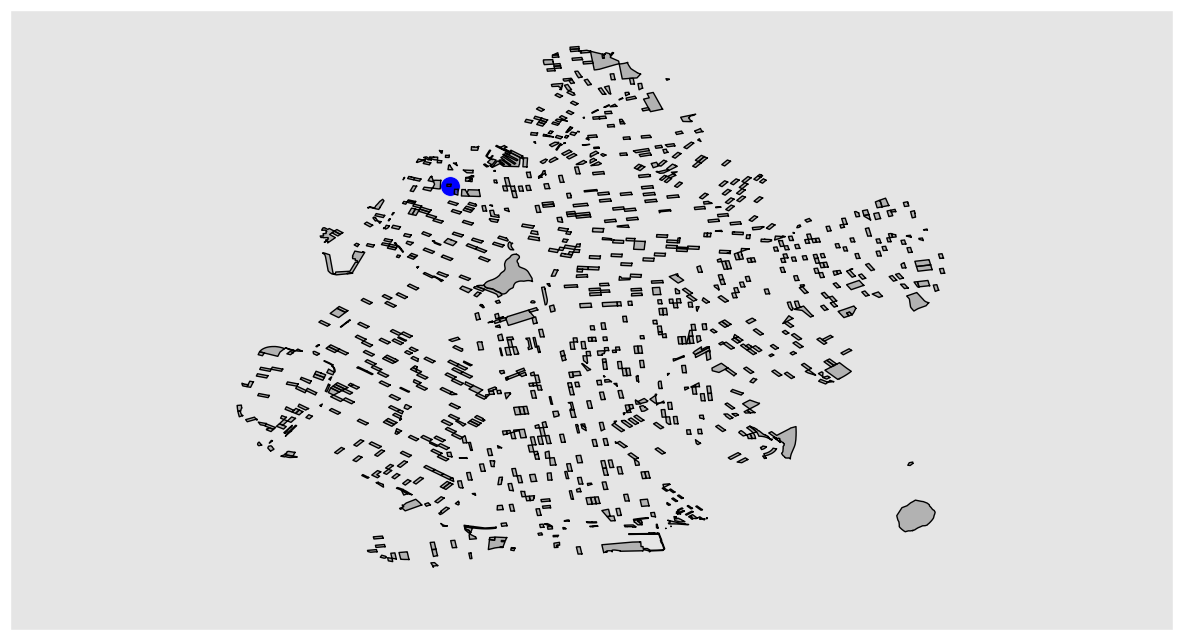

In [48]:
f, ax = plt.subplots(figsize=(15,8))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ct_latlon[::10].plot(ax=ax, color="grey")
ct_latlon[ct_latlon.geometry.contains(cusp_point)].plot(ax=ax, color="red")
ax.scatter(-73.986403, 40.693217, s=200)